<a href="https://colab.research.google.com/github/Singh07-Shubham/Custom-Object-Detection/blob/master/kanbanwithtextblock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [0]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [0]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [0]:
# make darknet (build)
!make

In [0]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [0]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/kanban_new/obj.zip ../

In [0]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d darknet/data/

In [0]:
cd darknet

In [0]:
!cp /mydrive/yolov3/kanban_new/yolov3_custom.cfg cfg/

In [0]:
!cp /mydrive/yolov3/kanban_new/obj.names data/
!cp /mydrive/yolov3/kanban_new/obj.data data/

In [0]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/kanban_new/generate_train.py ./

In [0]:
!python generate_train.py

In [0]:
!ls data/

In [0]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

In [0]:
# train your custom detector
# !./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/kanban_new/yolov3_custom_last.weights -dont_show

In [20]:
!ls

darknet  gdrive  sample_data


In [21]:
%cd darknet

/content/darknet


In [22]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [0]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/kanban_new/yolov3_custom_final.weights /mydrive/Images/test.jpg -thresh 0.3


In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

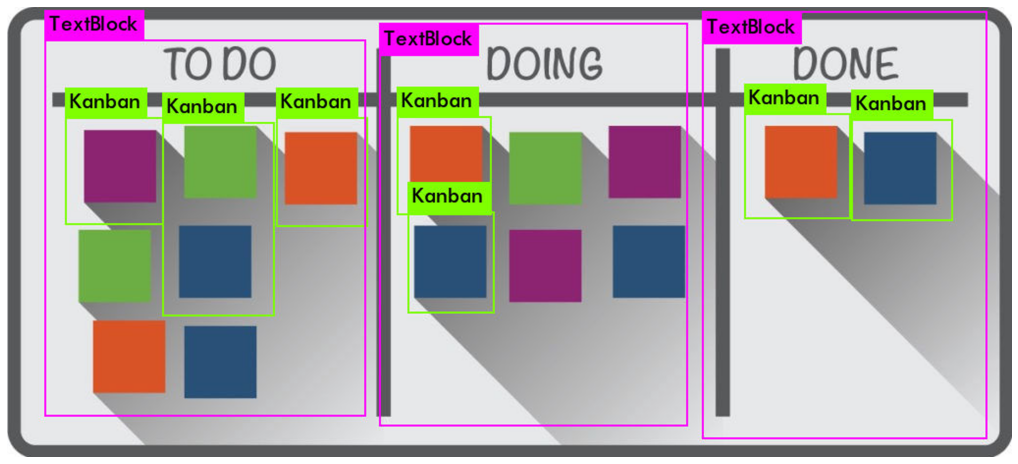

In [51]:
imShow('predictions.jpg')

In [0]:
!cp predictions.jpg /mydrive/Images/Predictions/test.jpg